### 1. Purpose
The purpose of this document is to provide a set of problems to be solved by Vodafone Advanced Data Analytics
candidates as a means of skill assessment.
### 2. Instructions
Solve the problems as directed below.

#### 2.1. Code base
- Python>=3.5
- Include requirements.txt file in each repository

### 2.2. Submission
Each solution should be uploaded as a GitHub repository that will be deleted after
assessment.

Provide the repository links to repos in an email to mo.namazi@vodafone.com.au

#### 2.3. Data
The data for the problems can be found here:

#### 2.4. Guidelines
General solutions to these problems may be found available on the internet, feel free to
leverage these, however keep in mind we are looking for out-of-the-box thinking as well as
neat and scalable code.
Focus on the areas you are skilled in.
You will be asked to explain your code in full detail.
This is an opportunity to show your skills, as much as pass a test, we do not have perfect
solutions in mind.

### Dataset Description

We provide an Amazon product reviews dataset for multilingual text classification. The dataset contains reviews in English collected between November 1, 2015 and November 1, 2019. Each record in the dataset contains the review text, the review title, the star rating, an anonymized reviewer ID, an anonymized product ID and the coarse-grained product category (e.g. ‘books’, ‘appliances’, etc.)

There are 200,000, and 5,000 reviews in the training and test sets respectively. The maximum number of reviews per reviewer is 20 and the maximum number of reviews per product is 20. All reviews are truncated after 2,000 characters, and all reviews are at least 20 characters long.

The dataset is provided in 2 different files:
- `data/dataset_en_train.json`

- `data/dataset_en_test.json`

### Task 1

Build a standalone python program (.py) that can be executed in command-line (such as Terminal, Powershell, etc.). Choose one of the tasks below. Note that, the bonus task is not compulsory, but highly recommended to attempt.

`a.` Explore the dataset on the basic statistics, produce a classification model to predict the product category, and present the findings as well as the performance of the model.

`b.` Explore the dataset on the basic statistics, produce a model to predict the customer ratings, and present the findings as well the performance of the model.

`bonus points.` build an engine that recommends top 5 products (i.e. product_id) to the customers in the `test` dataset

In [3]:
#TODO

### Task 2

Build a controlled environment to package the above solution, so that this code and model could be easily executed in different platform and servers without manually resolving the dependencies/libraries.

- Build the environment/application that the training and inferencing workflow could be executed separated in CLI.

Note that, it is important to keep in mind that, the same code need to be executed in our environemnt without changing the code submitted.

`Hint.` containerization. To complete this task, it is expected to include the detailed steps of executing the build of the container environment.

In [ ]:
#TODO

### Task 3

From the result from `Task 1`, build insights that you could find from the provided dataset as well as the predictive results.

In [18]:
#TODO

## 3.1 Data Exploration

Let's explore distribution of labels and ratings. Fisrt, let's read and open our training json file into a pandas dataframe:

In [1]:
import pandas as pd
import numpy as np
import json
import os
current_dir = os.getcwd() 
current_dir

'/Users/johncalvo/Documents/Laborales/code_challenge_ml_engineer/vodafone-challenge/notebooks'

In [28]:
train_dataset = pd.read_json(current_dir + '../data/train_test/dataset_en_train.json', lines=True, orient='records')

In [29]:
train_dataset.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,en_0964290,product_en_0740675,reviewer_en_0342986,1,Arrived broken. Manufacturer defect. Two of th...,I'll spend twice the amount of time boxing up ...,en,furniture
1,en_0690095,product_en_0440378,reviewer_en_0133349,1,the cabinet dot were all detached from backing...,Not use able,en,home_improvement
2,en_0311558,product_en_0399702,reviewer_en_0152034,1,I received my first order of this product and ...,The product is junk.,en,home
3,en_0044972,product_en_0444063,reviewer_en_0656967,1,This product is a piece of shit. Do not buy. D...,Fucking waste of money,en,wireless
4,en_0784379,product_en_0139353,reviewer_en_0757638,1,went through 3 in one day doesn't fit correct ...,bubble,en,pc


In [30]:
print(train_dataset.shape)

(200000, 8)


In [31]:
print(train_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         200000 non-null  object
 1   product_id        200000 non-null  object
 2   reviewer_id       200000 non-null  object
 3   stars             200000 non-null  int64 
 4   review_body       200000 non-null  object
 5   review_title      200000 non-null  object
 6   language          200000 non-null  object
 7   product_category  200000 non-null  object
dtypes: int64(1), object(7)
memory usage: 12.2+ MB
None


Now, let's organize and reset data types so we can work with text and labels properly:

In [32]:
train_dataset["product_id"] = train_dataset["product_id"].astype("str")
train_dataset["reviewer_id"] = train_dataset["reviewer_id"].astype("str")
train_dataset["review_body"] = train_dataset["review_body"].astype("str")
train_dataset["review_title"] = train_dataset["review_title"].astype("str")
train_dataset["language"] = train_dataset["language"].astype("str")
train_dataset["product_category"] = train_dataset["product_category"].astype("str")

In [33]:
print(train_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         200000 non-null  object
 1   product_id        200000 non-null  object
 2   reviewer_id       200000 non-null  object
 3   stars             200000 non-null  int64 
 4   review_body       200000 non-null  object
 5   review_title      200000 non-null  object
 6   language          200000 non-null  object
 7   product_category  200000 non-null  object
dtypes: int64(1), object(7)
memory usage: 12.2+ MB
None


Now, let's describe our ratings:

In [34]:
train_dataset.describe()

,stars
count,200000.000000
mean,3.000000
std,1.414217
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [37]:
train_dataset["stars"].median()

3.0

In [39]:
train_dataset["stars"].mean()

3.0

In [41]:
train_dataset["stars"].std()

1.4142170979202593

Now, let's look at the class histogram:

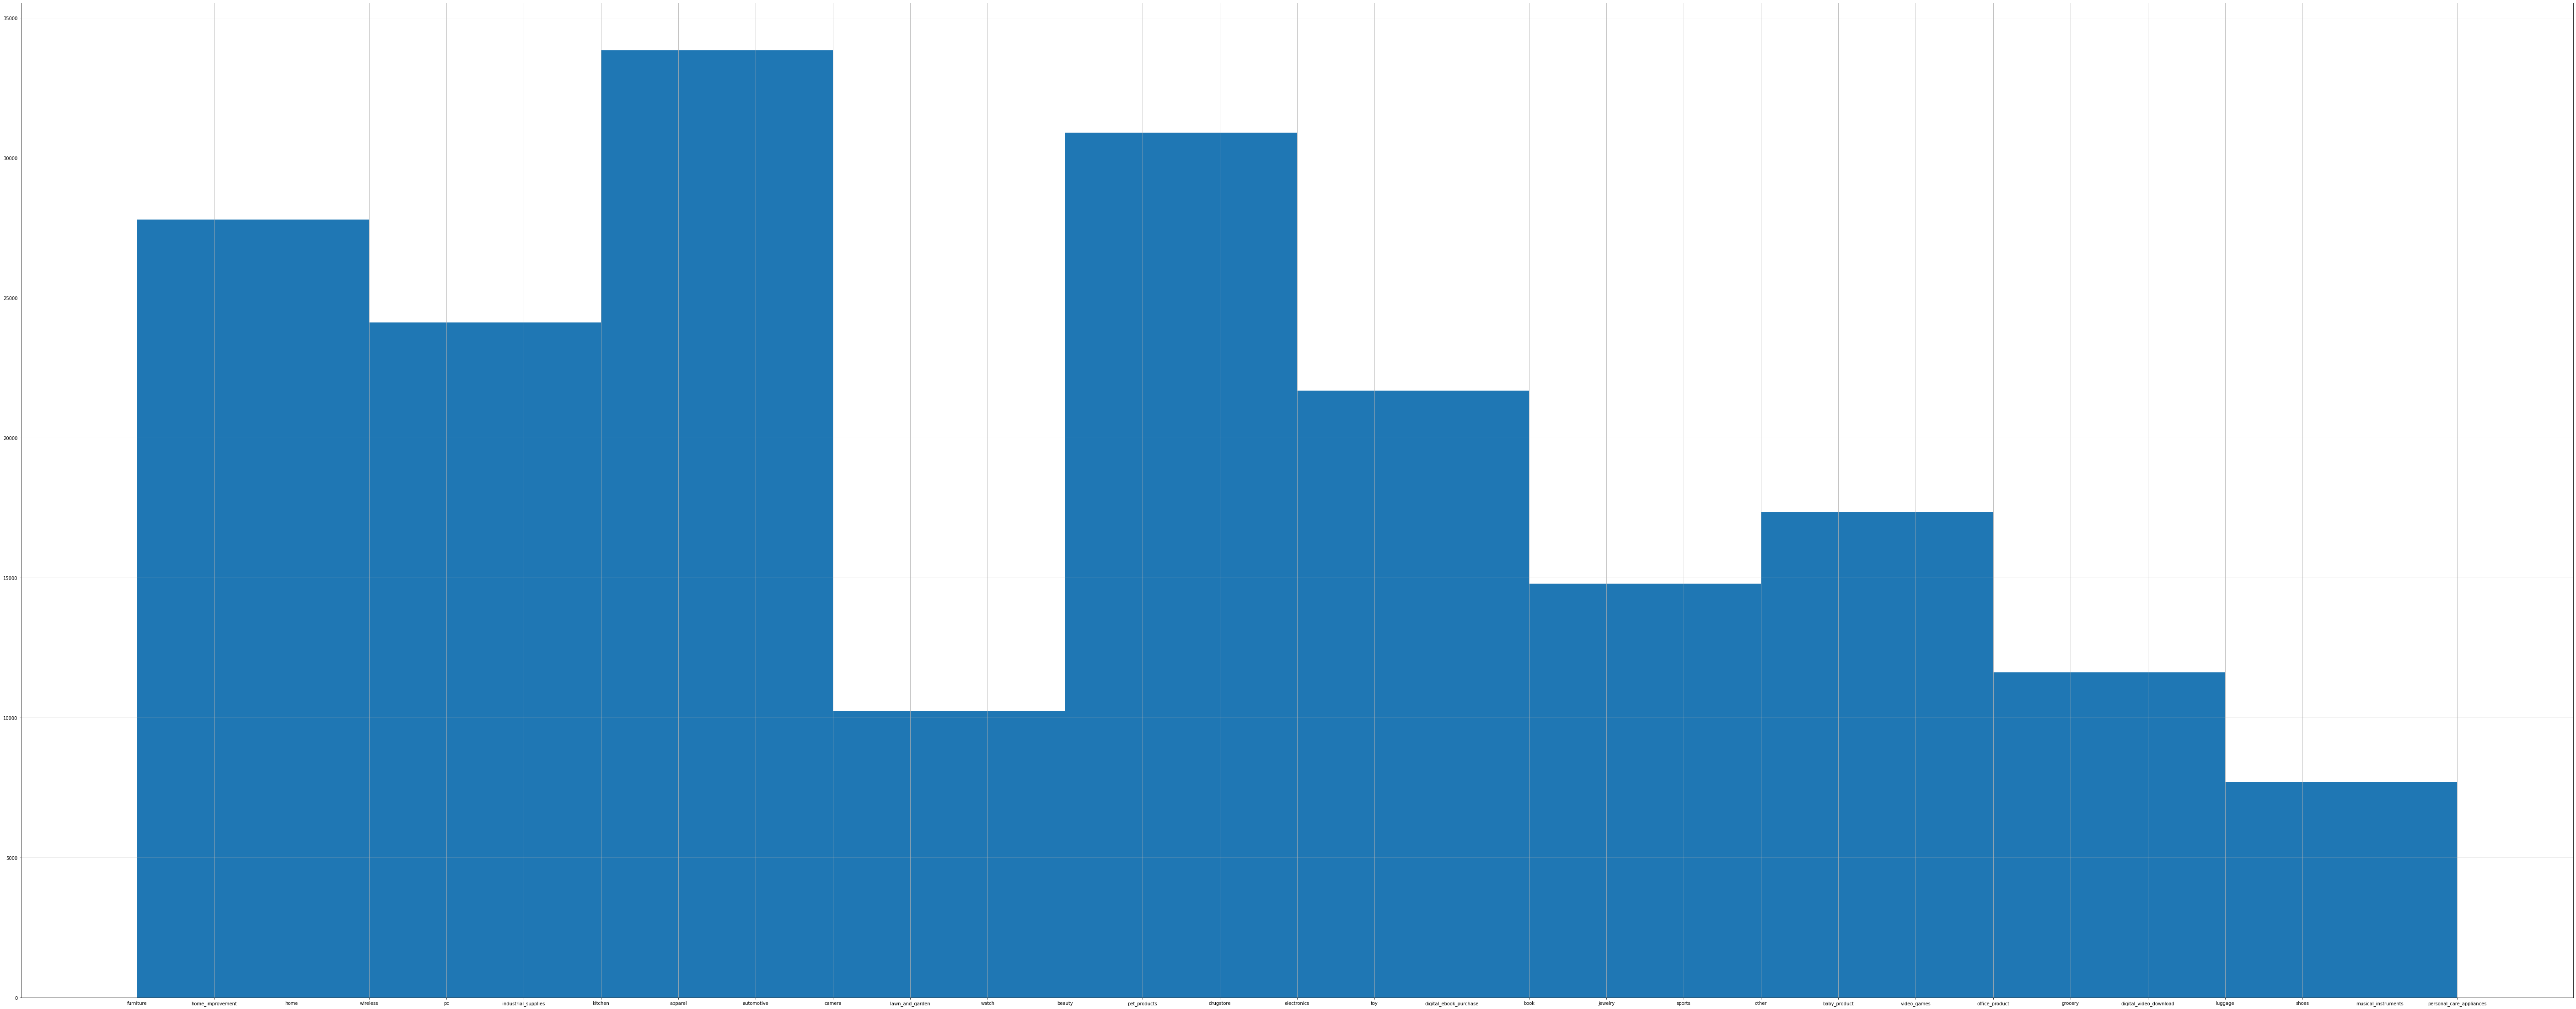

In [48]:
train_dataset["product_category"].hist(figsize = (100,40))

We can say that it is a relatively balanced(normal) distribution a few small clases (< 10%)

In [58]:
train_dataset.groupby(["product_category"]).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

,product_category,counts
12,home,17679
0,apparel,15951
30,wireless,15717
21,other,13418
3,beauty,12091
8,drugstore,11730
16,kitchen,10382
27,toy,8745
26,sports,8277
1,automotive,7506


In [88]:
# Groupby by country
product_cat = train_dataset.groupby("product_category")

# Summary statistic of all countries
product_cat.describe()

stars                                             
                            count      mean       std  min  25%  50%  75%  max
product_category                                                              
apparel                   15951.0  3.015736  1.303216  1.0  2.0  3.0  4.0  5.0
automotive                 7506.0  2.966294  1.440005  1.0  2.0  3.0  4.0  5.0
baby_product               3150.0  3.112063  1.387400  1.0  2.0  3.0  4.0  5.0
beauty                    12091.0  2.902407  1.423449  1.0  2.0  3.0  4.0  5.0
book                       3756.0  3.348775  1.410924  1.0  2.0  3.0  5.0  5.0
camera                     2139.0  3.002338  1.461861  1.0  2.0  3.0  4.0  5.0
digital_ebook_purchase     6749.0  3.666765  1.104335  1.0  3.0  4.0  4.0  5.0
digital_video_download     1364.0  2.851906  1.372106  1.0  2.0  3.0  4.0  5.0
drugstore                 11730.0  2.970503  1.430750  1.0  2.0  3.0  4.0  5.0
electronics                6186.0  2.891044  1.464788  1.0  2.0  3.0  4.0  5.0
furniture                  2984.0  2.960791  1.360869  1.0  2.0  3.0  4.0  5.0
grocery                    4730.0  2.801903  1.456015  1.0  1.0  3.0  4.0  5.0
home                      17679.0  3.047684  1.409542  1.0  2.0  3.0  4.0  5.0
home_improvement           7136.0  3.023122  1.442142  1.0  2.0  3.0  4.0  5.0
industrial_supplies        1994.0  3.000000  1.457889  1.0  2.0  3.0  4.0  5.0
jewelry                    2747.0  2.995996  1.397500  1.0  2.0  3.0  4.0  5.0
kitchen                   10382.0  3.061260  1.440769  1.0  2.0  3.0  4.0  5.0
lawn_and_garden            7327.0  2.866521  1.448895  1.0  2.0  3.0  4.0  5.0
luggage                    1328.0  3.247741  1.351962  1.0  2.0  3.0  4.0  5.0
musical_instruments        1102.0  3.083485  1.431550  1.0  2.0  3.0  4.0  5.0
office_product             5521.0  3.051983  1.444886  1.0  2.0  3.0  4.0  5.0
other                     13418.0  3.024817  1.419546  1.0  2.0  3.0  4.0  5.0
pc                         6401.0  2.904234  1.461394  1.0  2.0  3.0  4.0  5.0
personal_care_appliances     75.0  2.853333  1.503989  1.0  1.5  3.0  4.0  5.0
pet_products               7082.0  2.931799  1.393798  1.0  2.0  3.0  4.0  5.0
shoes                      5197.0  3.091976  1.326002  1.0  2.0  3.0  4.0  5.0
sports                     8277.0  3.118884  1.399571  1.0  2.0  3.0  4.0  5.0
toy                        8745.0  2.971298  1.433402  1.0  2.0  3.0  4.0  5.0
video_games                 775.0  2.781935  1.449471  1.0  1.0  3.0  4.0  5.0
watch                       761.0  2.939553  1.361703  1.0  2.0  3.0  4.0  5.0
wireless                  15717.0  2.726729  1.420662  1.0  1.0  3.0  4.0  5.0

In [91]:
import matplotlib.pyplot as plt

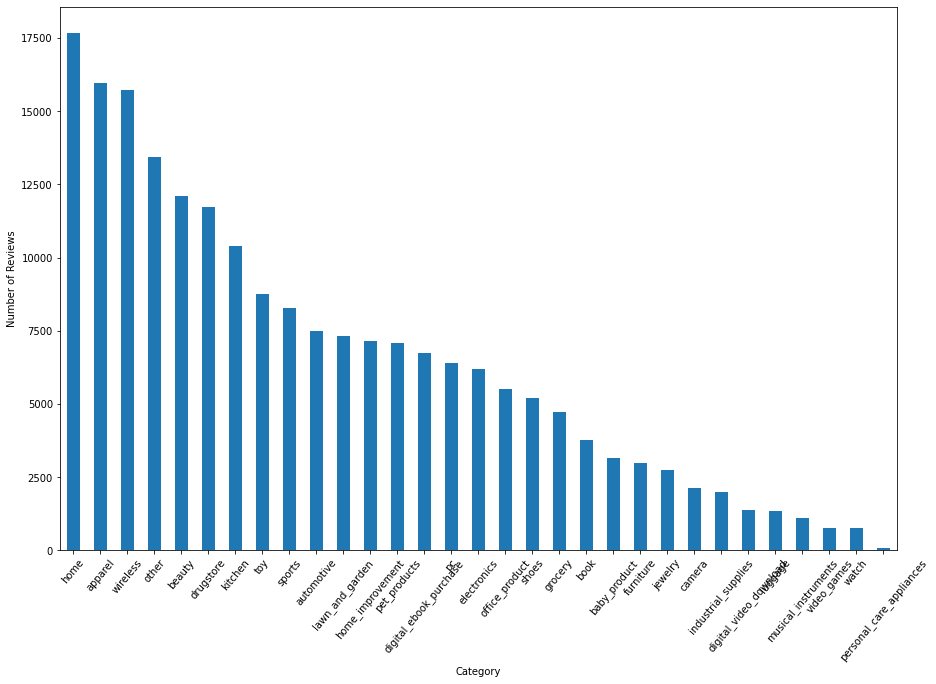

In [92]:
plt.figure(figsize=(15,10))
product_cat.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Category")
plt.ylabel("Number of Reviews")
plt.show()

## 3.2 Word Frequency Counts
In this section, I calculated frequency counts to find the most common words by label, so I can visualize associations of words by category.

In [62]:
import spacy
import scattertext as st

nlp = spacy.load('en_core_web_sm')
corpus = st.CorpusFromPandas(train_dataset,
                             category_col='product_category',
                             text_col='review_body',
                             nlp=nlp).build()

## 3.2.1 Visuals by top 5 categories

To do that, we remove the stop words:

In [94]:
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator


In [107]:
stopwords = set(STOPWORDS)
stopwords.update(["product"])

In [123]:
#review_title
#review_body
home = " ".join(review for review in train_dataset[train_dataset["product_category"]=="home"].review_body) 
apparel = " ".join(review for review in train_dataset[train_dataset["product_category"]=="apparel"].review_body)
wireless = " ".join(review for review in train_dataset[train_dataset["product_category"]=="wireless"].review_body)
beauty = " ".join(review for review in train_dataset[train_dataset["product_category"]=="beauty"].review_body)
drugstore = " ".join(review for review in train_dataset[train_dataset["product_category"]=="drugstore"].review_body)

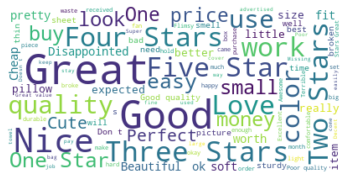

In [122]:
# Create and generate a word cloud image:
home_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(home)

plt.figure()
plt.imshow(home_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

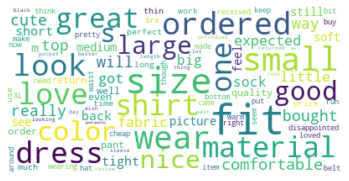

In [110]:
apparel_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(apparel)

plt.figure()
plt.imshow(apparel_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

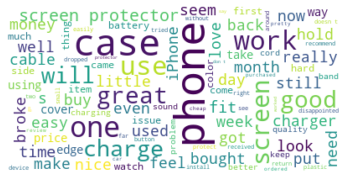

In [111]:
wireless_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(wireless)

plt.figure()
plt.imshow(wireless_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

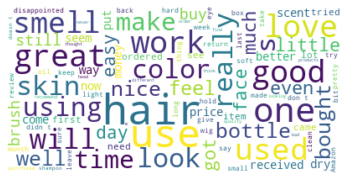

In [112]:
beauty_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(beauty)

plt.figure()
plt.imshow(beauty_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

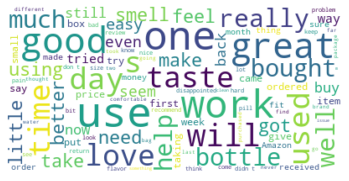

In [113]:
drugstore_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(drugstore)

plt.figure()
plt.imshow(drugstore_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Insights
We can see clear word paterns across the categories, sentiment-like words such as good, bad, great, and love. And category-specific words such as shirt in appearel, or phone in the wireless category.

## 3.2.1 Visuals by star rating
In this way, I would expect to have clouds by star rating, partitioning the sentiment-based words clearly. Let's have a look:

In [114]:
#review_title
#review_body
one_star = " ".join(review for review in train_dataset[train_dataset["stars"]==1.0].review_body)
two_stars = " ".join(review for review in train_dataset[train_dataset["stars"]==2.0].review_body)
three_stars = " ".join(review for review in train_dataset[train_dataset["stars"]==3.0].review_body)
four_stars = " ".join(review for review in train_dataset[train_dataset["stars"]==4.0].review_body)
five_stars = " ".join(review for review in train_dataset[train_dataset["stars"]==5.0].review_body)

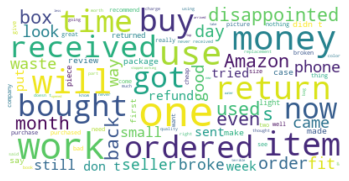

In [115]:
one_star_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(one_star)

plt.figure()
plt.imshow(one_star_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

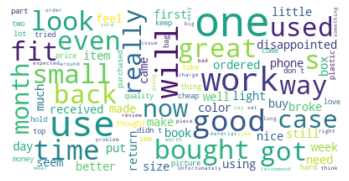

In [116]:
two_stars_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(two_stars)

plt.figure()
plt.imshow(two_stars_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

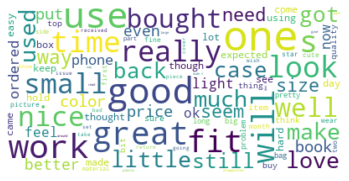

In [117]:
three_stars_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(three_stars)

plt.figure()
plt.imshow(three_stars_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

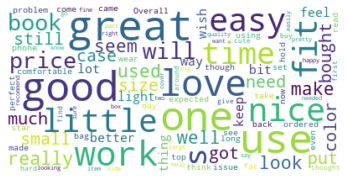

In [118]:
four_stars_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(four_stars)

plt.figure()
plt.imshow(four_stars_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

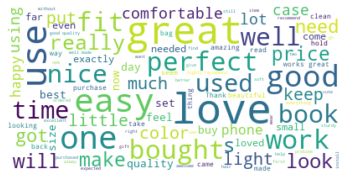

In [119]:
five_stars_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(five_stars)

plt.figure()
plt.imshow(five_stars_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Insights
It is clear that sentiment-based words varies according to star rating. negative words like hate, or bad appear more frequently in low-star ratings whereas positive words such as love and good are more frequent in high-star ratings.

These results support frequency-based machine learning approach in the featurization part to train our models.

## Insight 2: Review title to predict ratings
One thing I've noticed during data exploration, is that review titles are major predictors of star ratings, as they contain mainly sentiment-based words.
This can be seen  in the following cloud exploration:

In [125]:
#review_title
#review_body
one_star = " ".join(review for review in train_dataset[train_dataset["stars"]==1.0].review_title)
two_stars = " ".join(review for review in train_dataset[train_dataset["stars"]==2.0].review_title)
three_stars = " ".join(review for review in train_dataset[train_dataset["stars"]==3.0].review_title)
four_stars = " ".join(review for review in train_dataset[train_dataset["stars"]==4.0].review_title)
five_stars = " ".join(review for review in train_dataset[train_dataset["stars"]==5.0].review_title)

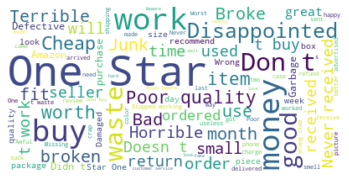

In [126]:
one_star_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(one_star)

plt.figure()
plt.imshow(one_star_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

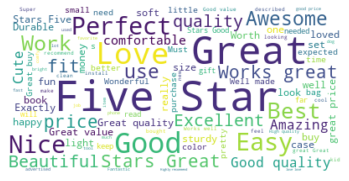

In [127]:
five_stars_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(five_stars)

plt.figure()
plt.imshow(five_stars_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Thus, I will work with review titles to train star rating models, based on frequency-based data transofrmation approaches.